In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# X = size of house
# Y = price of house

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


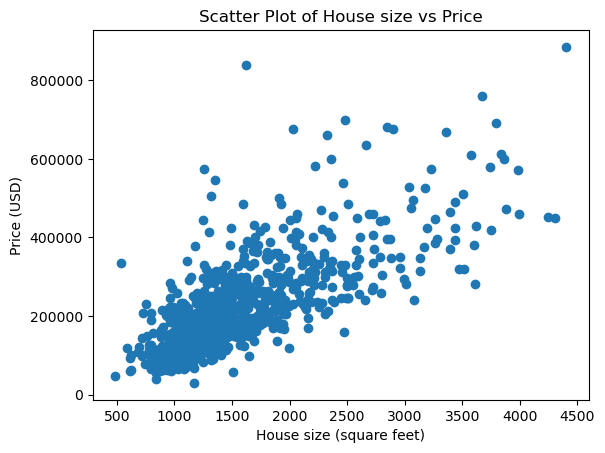

In [4]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()


In [7]:
np.random.seed(10)
small_sacramento = sacramento.sample(n=30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


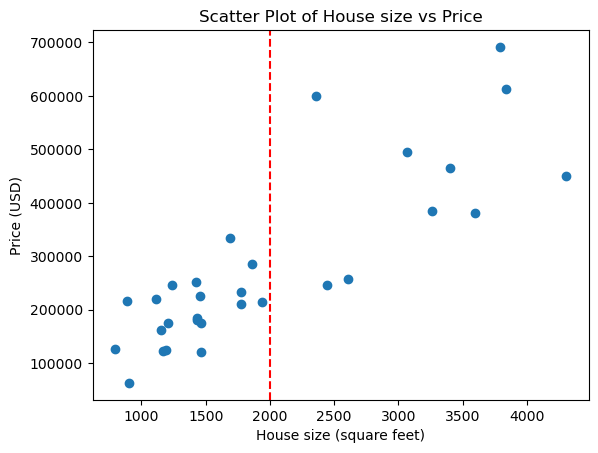

In [8]:
#2,000 sq ft home to make price predictions
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()


In [10]:
#calculating the abs difference between 2000 and the sq ft of each house
small_sacramento['dist'] = (2000 - small_sacramento["sq__ft"]).abs()
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221,544
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670,1205
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211,1788
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424,1070
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878,605
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678,765
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987,576
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142,356
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627,564


In [17]:
#finding the 5 rows with the smallest distance

nearest_neighbors = small_sacramento.nsmallest(2,"dist")
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143


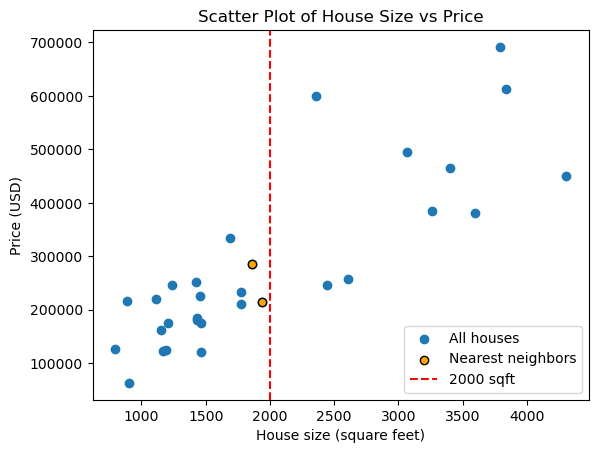

In [18]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [19]:
#make our prediction
prediction = nearest_neighbors['price'].mean()
prediction

250000.0

In [22]:
#75 train, 25% test
sacramento_train, sacramento_test = train_test_split(sacramento, train_size= 0.75, random_state=42)

In [23]:
#step 1. define x and y

X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [24]:
#step 2. initialize our model
knn_regression = KNeighborsRegressor()

In [25]:
#step 3 define our parameter grid

param_grid = {
    "n_neighbors":range(1,201,3)
}

In [26]:
#step 4 initalize and fit grid search

sacr_gridsearch = GridSearchCV(
    estimator= knn_regression,
    param_grid= param_grid,
    cv = 5, 
    scoring = "neg_root_mean_squared_error" #also "r2"
)

In [27]:
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [28]:
#step 5, retrieve and format results
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002265,0.001112,0.001560,0.000669,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,-115096.457636,4675.375295,67
1,0.001263,0.000564,0.001041,0.000374,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,-93675.812662,5590.476086,49
2,0.000648,0.000038,0.000747,0.000073,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,-90334.266322,5182.482900,31
3,0.001248,0.000326,0.001362,0.000651,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,-88585.351601,6004.672460,20
4,0.000818,0.000316,0.000746,0.000211,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,-87276.736534,6617.179998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000840,0.000234,0.002571,0.000538,187,{'n_neighbors': 187},-89404.102502,-103889.117510,-110881.591477,-98253.628778,-78552.980467,-96196.284147,11282.645963,62
63,0.000665,0.000253,0.001985,0.000230,190,{'n_neighbors': 190},-89863.315392,-104222.245365,-111093.057167,-98689.116523,-78637.308937,-96501.008677,11318.161791,63
64,0.000992,0.000507,0.002386,0.000493,193,{'n_neighbors': 193},-90257.326655,-104471.730296,-111383.626131,-99098.910125,-78655.460986,-96773.410839,11391.662919,64
65,0.000571,0.000101,0.001984,0.000506,196,{'n_neighbors': 196},-90618.127253,-104552.352275,-111682.970126,-99529.902613,-78741.616470,-97024.993747,11429.101358,65


In [29]:
results['mean_test_score'] = results['mean_test_score'].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002265,0.001112,0.001560,0.000669,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,115096.457636,4675.375295,67
1,0.001263,0.000564,0.001041,0.000374,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,93675.812662,5590.476086,49
2,0.000648,0.000038,0.000747,0.000073,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,90334.266322,5182.482900,31
3,0.001248,0.000326,0.001362,0.000651,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,88585.351601,6004.672460,20
4,0.000818,0.000316,0.000746,0.000211,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,87276.736534,6617.179998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000840,0.000234,0.002571,0.000538,187,{'n_neighbors': 187},-89404.102502,-103889.117510,-110881.591477,-98253.628778,-78552.980467,96196.284147,11282.645963,62
63,0.000665,0.000253,0.001985,0.000230,190,{'n_neighbors': 190},-89863.315392,-104222.245365,-111093.057167,-98689.116523,-78637.308937,96501.008677,11318.161791,63
64,0.000992,0.000507,0.002386,0.000493,193,{'n_neighbors': 193},-90257.326655,-104471.730296,-111383.626131,-99098.910125,-78655.460986,96773.410839,11391.662919,64
65,0.000571,0.000101,0.001984,0.000506,196,{'n_neighbors': 196},-90618.127253,-104552.352275,-111682.970126,-99529.902613,-78741.616470,97024.993747,11429.101358,65


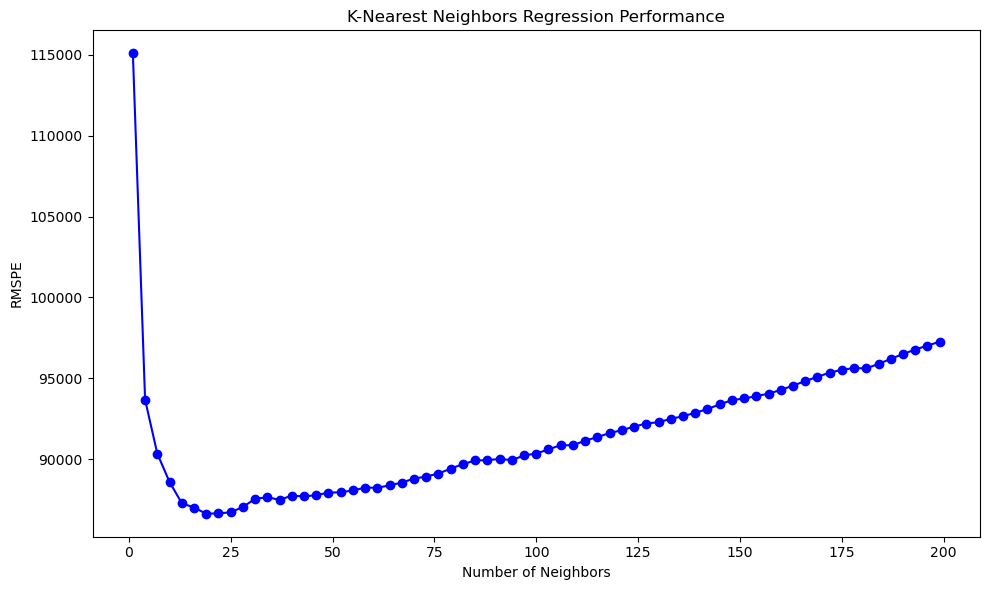

In [31]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()


In [32]:
sacr_gridsearch.best_params_

{'n_neighbors': 19}

In [33]:
sacramento_test['predicted'] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

In [34]:
rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test['predicted']
)**0.5
rmspe

74240.70943389146

In [35]:
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)
r2

0.49526130381694955

/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


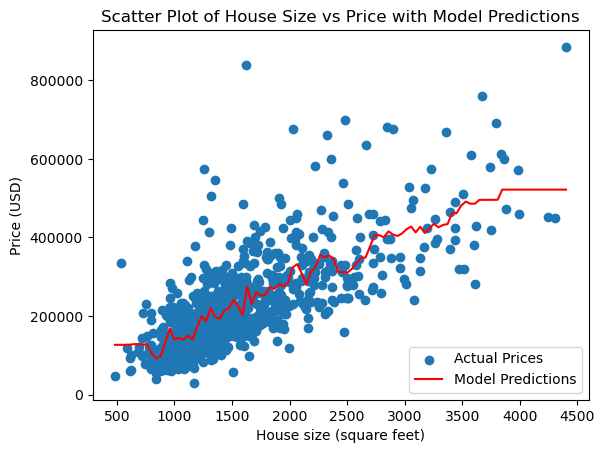

In [36]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")
# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()

In [37]:
import math

In [50]:
def rmspe(y_true, y_pred):
    n = len(y_true)
    squared_errors = []
    for i in range(n):
        error = y_true.iloc[i] - y_pred.iloc[i]
        squared_errors.append(error**2)
    mean_squared_error = sum(squared_errors)/n
    rmspe_value = math.sqrt(mean_squared_error)
    return rmspe_value

In [51]:
y_true = sacramento_test["price"]
y_pred = sacramento_test["predicted"]

rmspe(y_true, y_pred)

74240.70943389146